In [1]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import scale

In [2]:
# Read file
df = pd.read_csv('top250imdb.csv')

In [3]:
df.head()

,movieID,title,rating,votes,year,writer,cast,genre,kind,cover url,director,production companies,runtimes,top 250 rank,plot
0,111161,The Shawshank Redemption,9.3,2177369,1994,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Drama,movie,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Frank Darabont,Castle Rock Entertainment,142,1,Two imprisoned men bond over a number of years...
1,68646,The Godfather,9.2,1500031,1972,"Mario Puzo, Francis Ford Coppola, Mario Puzo","Marlon Brando, Al Pacino, James Caan, Richard ...","Crime, Drama",movie,https://m.media-amazon.com/images/M/MV5BM2MyNj...,Francis Ford Coppola,"Paramount Pictures, Alfran Productions",175,2,The aging patriarch of an organized crime dyna...
2,71562,The Godfather: Part II,9.0,1050231,1974,"Francis Ford Coppola, Mario Puzo, Mario Puzo","Al Pacino, Robert Duvall, Diane Keaton, Robert...","Crime, Drama",movie,https://m.media-amazon.com/images/M/MV5BMWMwMG...,Francis Ford Coppola,"Paramount Pictures, The Coppola Company, Ameri...",202,3,The early life and career of Vito Corleone in ...
3,468569,The Dark Knight,9.0,2161008,2008,"Jonathan Nolan, Christopher Nolan, Christopher...","Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama, Thriller",movie,https://m.media-amazon.com/images/M/MV5BMTMxNT...,Christopher Nolan,"Warner Bros., Legendary Entertainment, Syncopy...",152,4,When the menace known as the Joker wreaks havo...
4,50083,12 Angry Men,8.9,633882,1957,"Reginald Rose, Reginald Rose","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Drama,movie,https://m.media-amazon.com/images/M/MV5BMWU4N2...,Sidney Lumet,Orion-Nova Productions,96,5,A jury holdout attempts to prevent a miscarria...


In [4]:
# Function and global variable

genres = ["action", "adventure", "biography", "comedy", "crime", "drama",
          "family","fantasy", "history", "music", "mystery", "romance", "sci-fi",
          "sport", "thriller", "war", "western" ]

num_features = ['rating', 'votes', 'year', 'runtimes', 'top 250 rank']

def generate_scaled_df(df):
    arr_scale = scale(df)
    res_df = pd.DataFrame(arr_scale, columns = df.columns)
    
    return res_df

# One-Hot encoding genre
def hot_encoding(x, ge):
    if x.str.contains(ge):
        return 0.99
    else:
        return 0.01    

def create_hot_encoding_genre(df, genres):
    res_df = pd.DataFrame()
    for g in genres:
        res_df[g] = df['genre'].str.lower().str.contains(g)
        res_df[g] = res_df[g].apply(lambda x: 1 if x == True else 0)
    
    return res_df

def create_two_combined_genres(df, genres):
    res_df = pd.DataFrame()
    for g1 in genres:
        for g2 in genres:
            if g1 != g2:
                res_df[g1+"-"+g2] = df[g1] & df[g2]
    
    return res_df

In [5]:
# See 5 samples of data
df.head()

,movieID,title,rating,votes,year,writer,cast,genre,kind,cover url,director,production companies,runtimes,top 250 rank,plot
0,111161,The Shawshank Redemption,9.3,2177369,1994,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Drama,movie,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Frank Darabont,Castle Rock Entertainment,142,1,Two imprisoned men bond over a number of years...
1,68646,The Godfather,9.2,1500031,1972,"Mario Puzo, Francis Ford Coppola, Mario Puzo","Marlon Brando, Al Pacino, James Caan, Richard ...","Crime, Drama",movie,https://m.media-amazon.com/images/M/MV5BM2MyNj...,Francis Ford Coppola,"Paramount Pictures, Alfran Productions",175,2,The aging patriarch of an organized crime dyna...
2,71562,The Godfather: Part II,9.0,1050231,1974,"Francis Ford Coppola, Mario Puzo, Mario Puzo","Al Pacino, Robert Duvall, Diane Keaton, Robert...","Crime, Drama",movie,https://m.media-amazon.com/images/M/MV5BMWMwMG...,Francis Ford Coppola,"Paramount Pictures, The Coppola Company, Ameri...",202,3,The early life and career of Vito Corleone in ...
3,468569,The Dark Knight,9.0,2161008,2008,"Jonathan Nolan, Christopher Nolan, Christopher...","Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama, Thriller",movie,https://m.media-amazon.com/images/M/MV5BMTMxNT...,Christopher Nolan,"Warner Bros., Legendary Entertainment, Syncopy...",152,4,When the menace known as the Joker wreaks havo...
4,50083,12 Angry Men,8.9,633882,1957,"Reginald Rose, Reginald Rose","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Drama,movie,https://m.media-amazon.com/images/M/MV5BMWU4N2...,Sidney Lumet,Orion-Nova Productions,96,5,A jury holdout attempts to prevent a miscarria...


In [6]:
df['director'].unique()

array(['Frank Darabont', 'Francis Ford Coppola', 'Christopher Nolan',
       'Sidney Lumet', 'Steven Spielberg', 'Peter Jackson',
       'Quentin Tarantino', 'Sergio Leone', 'David Fincher',
       'Robert Zemeckis', 'Irvin Kershner',
       'Lana Wachowski, Lilly Wachowski', 'Martin Scorsese',
       'Milos Forman', 'Akira Kurosawa', 'Fernando Meirelles, Kátia Lund',
       'Roberto Benigni', 'Jonathan Demme', 'Frank Capra', 'George Lucas',
       'Todd Phillips', 'Hayao Miyazaki', 'Bong Joon Ho', 'Luc Besson',
       'Masaki Kobayashi', 'Bryan Singer', 'Roger Allers, Rob Minkoff',
       'Tony Kaye', 'James Cameron', 'Roman Polanski', 'Charles Chaplin',
       'Alfred Hitchcock', 'Ridley Scott',
       'Olivier Nakache, Éric Toledano', 'Damien Chazelle',
       'Michael Curtiz', 'Isao Takahata', 'Giuseppe Tornatore',
       'Florian Henckel von Donnersmarck', 'Anthony Russo, Joe Russo',
       'Stanley Kubrick', 'Bob Persichetti, Peter Ramsey, Rodney Rothman',
       'Andrew Stanton'

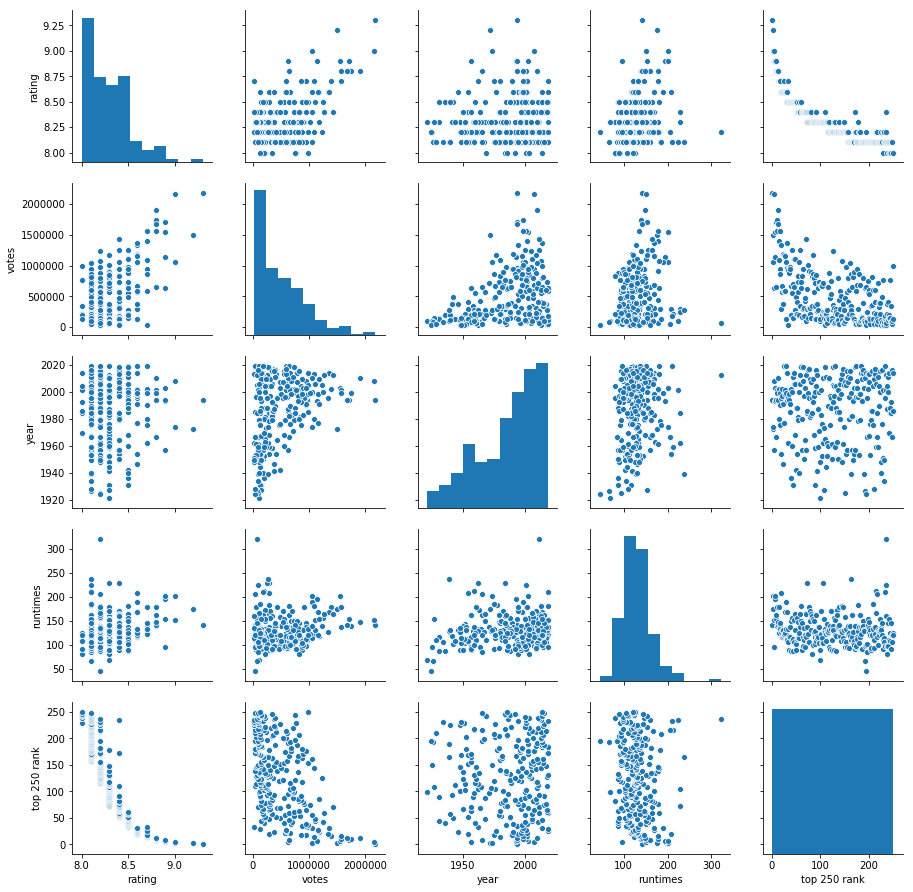

In [6]:
# See pairplot of numeric features
sns.pairplot(df[num_features])

In [7]:
# Create one_hot_encoding for genre
dfx = create_hot_encoding_genre(df, genres)
dfx.head()

,action,adventure,biography,comedy,crime,drama,family,fantasy,history,music,mystery,romance,sci-fi,sport,thriller,war,western
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Number of movies genre
dfx.sum().sort_values(ascending = False)

drama        183
thriller      60
adventure     58
crime         53
comedy        45
action        39
mystery       33
sci-fi        32
war           28
fantasy       28
romance       27
biography     27
family        26
history       15
music         11
sport         10
western        8
dtype: int64

In [9]:
# Combine numeric features and one-hot encoding genre
dfx2 = pd.concat([df[num_features], dfx], axis = 1)
dfx2.head()

,rating,votes,year,runtimes,top 250 rank,action,adventure,biography,comedy,crime,...,fantasy,history,music,mystery,romance,sci-fi,sport,thriller,war,western
0,9.3,2177369,1994,142,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.2,1500031,1972,175,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9.0,1050231,1974,202,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9.0,2161008,2008,152,4,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,8.9,633882,1957,96,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Scale features
dfx2 = generate_scaled_df(dfx2)
dfx2.head()

,rating,votes,year,runtimes,top 250 rank,action,adventure,biography,comedy,crime,...,fantasy,history,music,mystery,romance,sci-fi,sport,thriller,war,western
0,4.409026,3.861678,0.287142,0.347013,-1.725136,-0.429923,-0.549621,-0.34796,-0.468521,-0.518686,...,-0.355142,-0.252646,-0.214535,-0.389966,-0.34796,-0.383131,-0.204124,-0.561951,-0.355142,-0.181818
1,3.967770,2.295819,-0.607634,1.346612,-1.711280,-0.429923,-0.549621,-0.34796,-0.468521,1.927947,...,-0.355142,-0.252646,-0.214535,-0.389966,-0.34796,-0.383131,-0.204124,-0.561951,-0.355142,-0.181818
2,3.085259,1.255978,-0.526291,2.164467,-1.697423,-0.429923,-0.549621,-0.34796,-0.468521,1.927947,...,-0.355142,-0.252646,-0.214535,-0.389966,-0.34796,-0.383131,-0.204124,-0.561951,-0.355142,-0.181818
3,3.085259,3.823855,0.856545,0.649922,-1.683567,2.325996,-0.549621,-0.34796,-0.468521,1.927947,...,-0.355142,-0.252646,-0.214535,-0.389966,-0.34796,-0.383131,-0.204124,1.779513,-0.355142,-0.181818
4,2.644003,0.293469,-1.217709,-1.046369,-1.669710,-0.429923,-0.549621,-0.34796,-0.468521,-0.518686,...,-0.355142,-0.252646,-0.214535,-0.389966,-0.34796,-0.383131,-0.204124,-0.561951,-0.355142,-0.181818


In [11]:
# Function for recommending top 10 relevant movies
def recommend_movie(user, df, df_title):
    theta_user = df.loc[user,:].mean()
    cos = cosine_similarity( np.array(theta_user).reshape(1,-1), df)
    i, j = np.where( ((cos > 0))& (cos != 1) )
    rec_idx = np.setdiff1d(j, user)
    df_result =  pd.concat([df_title.loc[rec_idx], pd.Series(cos[0][rec_idx], index = rec_idx, name = 'cosine_similarity')], axis = 1) 
    df_result = df_result.sort_values(by = 'cosine_similarity' ,ascending = False)
    df_result = df_result.head(10)
    print(df_result)

In [12]:
# User A likes Avenger Endgame, Infinity War, Guardian of the Galaxy, Logan, Interstellar
# Superhero
uA = [59, 60, 249, 212, 30]

# User B likes Star Wars V The Empire strikes back, SW VI Return of the Jedi,
# LOTR Return of the king, LOTR fellowship of the ring, spirited away
# Fantasy
uB = [13, 79, 6, 9, 27]

# User C likes Forest Gump, Amelie, Marriage Story, Before Sunrise, Before Sunset
# Romance
uC = [11, 101, 182, 195, 237]

# User D likes 3 Idiots, Green Book, The Grand Budapest Hotel, PK, Aladin
# Comedy
uD = [78, 126, 192, 241, 245]

# User E likes Spirited Away, The Lion King, Your Name, Coco, Toy Story 3
uE = [27, 34, 73, 75, 105]

In [14]:
# Movies selected by user B
df.loc[uB, ['title', 'rating', 'genre']]

,title,rating,genre
13,Star Wars: Episode V - The Empire Strikes Back,8.7,"Action, Adventure, Fantasy, Sci-Fi"
79,Star Wars: Episode VI - Return of the Jedi,8.3,"Action, Adventure, Fantasy, Sci-Fi"
6,The Lord of the Rings: The Return of the King,8.9,"Adventure, Drama, Fantasy"
9,The Lord of the Rings: The Fellowship of the Ring,8.8,"Adventure, Drama, Fantasy"
27,Spirited Away,8.6,"Animation, Adventure, Family, Fantasy, Mystery"


In [14]:
# Recommendation movies for user B
recommend_movie(uA, dfx2, df[['title']])
# The recommendation seems good!!

                                          title  cosine_similarity
205                          Mad Max: Fury Road           0.804256
72                                       Aliens           0.793978
166                               Jurassic Park           0.793115
12                                    Inception           0.761796
37                   Terminator 2: Judgment Day           0.745123
152                              V for Vendetta           0.729726
15                                   The Matrix           0.708858
79   Star Wars: Episode VI - Return of the Jedi           0.684101
63            Spider-Man: Into the Spider-Verse           0.674018
24           Star Wars: Episode IV - A New Hope           0.644168


In [15]:
# Part 2
# Adding features of combination two genres in a movies
# Does the movie belong to these two genre (ex: Action, Adventure)

# Create two major genre
df2g = create_two_combined_genres(dfx, genres)
# Drop null columns
null_column = df2g.sum()[df2g.sum() == 0].index
df2g = df2g.drop(columns = null_column)
df2g.head()

,action-adventure,action-biography,action-comedy,action-crime,action-drama,action-family,action-fantasy,action-mystery,action-romance,action-sci-fi,...,war-romance,war-thriller,war-western,western-action,western-adventure,western-biography,western-comedy,western-crime,western-drama,western-war
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Number of movies by two combined genres
df2g.sum().sort_values(ascending = False)

drama-crime       43
crime-drama       43
thriller-drama    40
drama-thriller    40
drama-war         28
                  ..
music-history      1
music-mystery      1
music-sport        1
music-war          1
fantasy-crime      1
Length: 190, dtype: int64

In [16]:
# Combine num_features + one-hot encoding genre + one-hot encoding two genres 
dfx3 = pd.concat([df[num_features], dfx, df2g], axis = 1)
dfx3.head()

,rating,votes,year,runtimes,top 250 rank,action,adventure,biography,comedy,crime,...,war-romance,war-thriller,war-western,western-action,western-adventure,western-biography,western-comedy,western-crime,western-drama,western-war
0,9.3,2177369,1994,142,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.2,1500031,1972,175,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9.0,1050231,1974,202,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9.0,2161008,2008,152,4,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8.9,633882,1957,96,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Scale feattures
dfx3 = generate_scaled_df(dfx3)
dfx3.head()

,rating,votes,year,runtimes,top 250 rank,action,adventure,biography,comedy,crime,...,war-romance,war-thriller,war-western,western-action,western-adventure,western-biography,western-comedy,western-crime,western-drama,western-war
0,4.409026,3.861678,0.287142,0.347013,-1.725136,-0.429923,-0.549621,-0.34796,-0.468521,-0.518686,...,-0.110208,-0.089803,-0.063372,-0.063372,-0.089803,-0.063372,-0.063372,-0.063372,-0.142857,-0.063372
1,3.967770,2.295819,-0.607634,1.346612,-1.711280,-0.429923,-0.549621,-0.34796,-0.468521,1.927947,...,-0.110208,-0.089803,-0.063372,-0.063372,-0.089803,-0.063372,-0.063372,-0.063372,-0.142857,-0.063372
2,3.085259,1.255978,-0.526291,2.164467,-1.697423,-0.429923,-0.549621,-0.34796,-0.468521,1.927947,...,-0.110208,-0.089803,-0.063372,-0.063372,-0.089803,-0.063372,-0.063372,-0.063372,-0.142857,-0.063372
3,3.085259,3.823855,0.856545,0.649922,-1.683567,2.325996,-0.549621,-0.34796,-0.468521,1.927947,...,-0.110208,-0.089803,-0.063372,-0.063372,-0.089803,-0.063372,-0.063372,-0.063372,-0.142857,-0.063372
4,2.644003,0.293469,-1.217709,-1.046369,-1.669710,-0.429923,-0.549621,-0.34796,-0.468521,-0.518686,...,-0.110208,-0.089803,-0.063372,-0.063372,-0.089803,-0.063372,-0.063372,-0.063372,-0.142857,-0.063372


In [22]:
# Movies selected by user B
df.loc[uB, ['title', 'rating', 'genre']]

,title,rating,genre
13,Star Wars: Episode V - The Empire Strikes Back,8.7,"Action, Adventure, Fantasy, Sci-Fi"
79,Star Wars: Episode VI - Return of the Jedi,8.3,"Action, Adventure, Fantasy, Sci-Fi"
6,The Lord of the Rings: The Return of the King,8.9,"Adventure, Drama, Fantasy"
9,The Lord of the Rings: The Fellowship of the Ring,8.8,"Adventure, Drama, Fantasy"
27,Spirited Away,8.6,"Animation, Adventure, Family, Fantasy, Mystery"


In [18]:
# Recommendation movies for user B
recommend_movie(uB, dfx3, df[['title', 'movieID']])
# It seems worse than first recommendation using only numeric features + one-hot encoding genre

                                            title  movieID  cosine_similarity
24             Star Wars: Episode IV - A New Hope    76759           0.778164
216            Nausicaä of the Valley of the Wind    87544           0.549782
14          The Lord of the Rings: The Two Towers   167261           0.543964
66                              Princess Mononoke   119698           0.469275
218  Harry Potter and the Deathly Hallows: Part 2  1201607           0.455852
248                             Castle in the Sky    92067           0.405918
190                      How to Train Your Dragon   892769           0.402170
131                          Howl's Moving Castle   347149           0.361794
60                         Avengers: Infinity War  4154756           0.341681
75                                           Coco  2380307           0.295165


In [24]:
df[df.title.str.contains("Up")]

,movieID,title,rating,votes,year,writer,cast,genre,kind,cover url,director,production companies,runtimes,top 250 rank,plot
46,64116,Once Upon a Time in the West,8.5,281940,1968,"Sergio Donati, Sergio Leone, Dario Argento","Claudia Cardinale, Henry Fonda, Jason Robards,...",Western,movie,https://m.media-amazon.com/images/M/MV5BZGI5Mj...,Sergio Leone,"Rafran Cinematografica, San Marco, Paramount P...",165,47,A mysterious stranger with a harmonica joins f...
71,87843,Once Upon a Time in America,8.4,288783,1984,"Harry Grey, Leonardo Benvenuti, Piero De Bernardi","Robert De Niro, James Woods, Elizabeth McGover...","Crime, Drama",movie,https://m.media-amazon.com/images/M/MV5BMGFkNW...,Sergio Leone,"The Ladd Company, Warner Bros., Producers Sale...",229,72,A former Prohibition-era Jewish gangster retur...
116,1049413,Up,8.2,876946,2009,"Pete Docter, Bob Peterson, Tom McCarthy","Edward Asner, Christopher Plummer, Jordan Naga...","Animation, Adventure, Comedy, Family",movie,https://m.media-amazon.com/images/M/MV5BMTk3ND...,"Pete Docter, Bob Peterson","Pixar Animation Studios, Walt Disney Pictures",96,117,78-year-old Carl Fredricksen travels to Paradi...
234,169102,Lagaan: Once Upon a Time in India,8.1,96741,2001,"Ashutosh Gowariker, Ashutosh Gowariker, Kumar ...","Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...","Adventure, Drama, Musical, Sport",movie,https://m.media-amazon.com/images/M/MV5BNDYxNW...,Ashutosh Gowariker,"Aamir Khan Productions, Jhamu Sughand Productions",224,235,The people of a small village in Victorian Ind...


### Extended version: Perform PCA
What is PCA?
Principal Component Analysis (PCA) is one of tecnique to decompose features to lower number of features.
This method solves following problem:
1. To reduce computation power needed by reducing number of features
2. To enable us see the interpretation of data (by visualizing in 2D/3D chart)

In this case, we will use PCA for point 2.

In [19]:
# We will use implementation of PCA in sklearn
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components = 2) # we will visualize the data in 2D extracting from 212 features

In [21]:
# Fit and transform PCA
x_pca = pca.fit(dfx2).transform(dfx2)

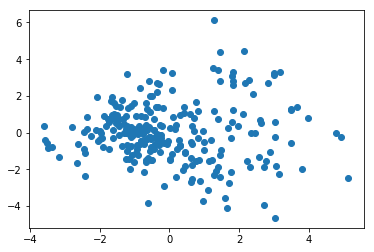

In [22]:
# Plot result PCA in 2D
plt.scatter(x_pca[:,0], x_pca[:,1])

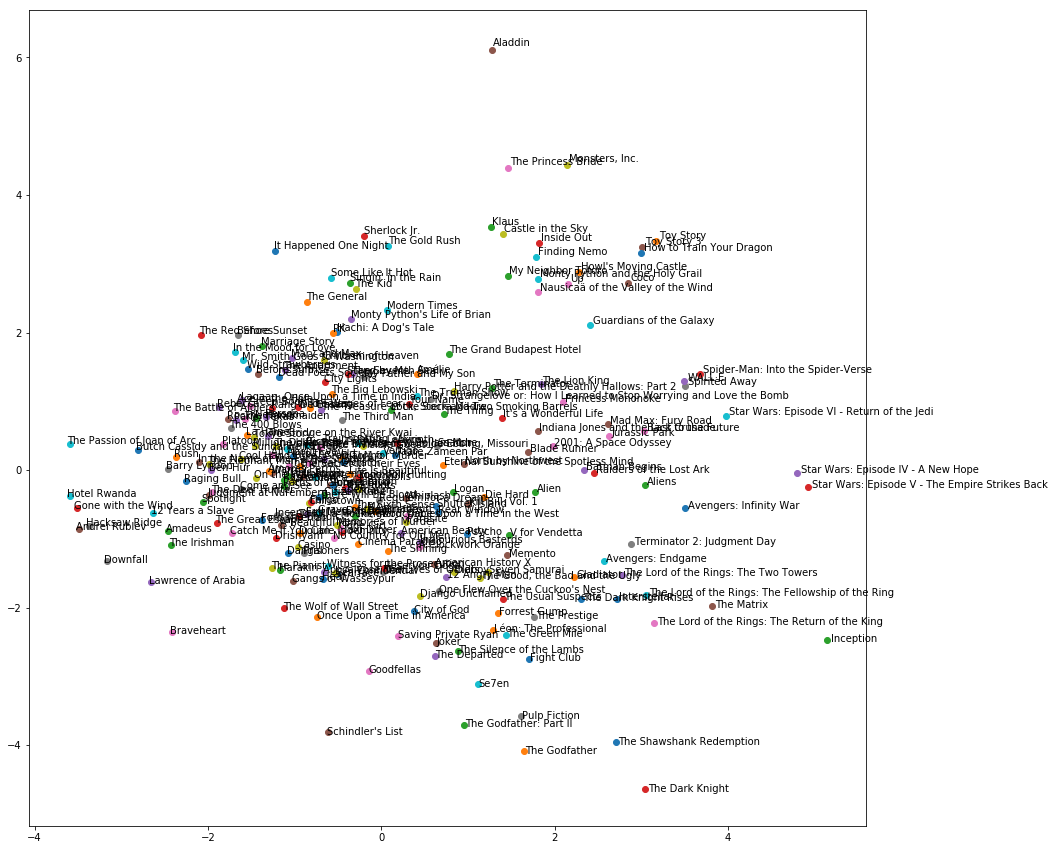

In [23]:
# Set figure size
fig = plt.figure(figsize=(15,15))

# Put annotation on each point
for i in range(len(x_pca)):
    x = x_pca[i,0]
    y = x_pca[i,1]
    plt.scatter(x,y)
    plt.text(x*(1+0.01), y*(1+0.01), df.loc[i,'title'] ,fontsize=10)

plt.show()